In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/기계학습/ml _data/data.csv", index_col = "price_in_aed")

In [53]:
data

,title,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
price_in_aed,,,,,,,,,,,,,,,,,,,
"26,000",MITSUBISHI PAJERO 3.5L / 2013,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
"110,000",chevrolet silverado,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
"78,000",MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
"899,000",WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
"33,000",USED RENAULT DOKKER 2020,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"215,000",AED7525month | 2015 Land Rover Range Rover Aut...,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021
"90,000",LOW MILEAGE Cadillac Escalade Platinum,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022
"679,000",WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021


In [54]:
df = data.loc[:,["kilometers", "no_of_cylinders", "horsepower","year"]]

In [55]:
df

,kilometers,no_of_cylinders,horsepower,year
price_in_aed,,,,
"26,000",167390,6,Unknown,2013.0
"110,000",39000,8,400 - 500 HP,2018.0
"78,000",200000,6,400 - 500 HP,2014.0
"899,000",27000,8,600 - 700 HP,2018.0
"33,000",69000,4,Less than 150 HP,2020.0
...,...,...,...,...
"215,000",105777,8,500 - 600 HP,2015.0
"90,000",55640,8,400 - 500 HP,2014.0
"679,000",100,8,400 - 500 HP,NaN


In [56]:
df.isnull().sum()

kilometers           0
no_of_cylinders     59
horsepower           0
year               970
dtype: int64

In [57]:
df = df.fillna(df.mean())

<ipython-input-57-04e87d67d337>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [58]:
df.isnull().sum()

kilometers          0
no_of_cylinders    59
horsepower          0
year                0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9970 entries, 26,000 to 77,700
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kilometers       9970 non-null   int64  
 1   no_of_cylinders  9911 non-null   object 
 2   horsepower       9970 non-null   object 
 3   year             9970 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 389.5+ KB


In [60]:
df.dropna()

,kilometers,no_of_cylinders,horsepower,year
price_in_aed,,,,
"26,000",167390,6,Unknown,2013.000000
"110,000",39000,8,400 - 500 HP,2018.000000
"78,000",200000,6,400 - 500 HP,2014.000000
"899,000",27000,8,600 - 700 HP,2018.000000
"33,000",69000,4,Less than 150 HP,2020.000000
...,...,...,...,...
"215,000",105777,8,500 - 600 HP,2015.000000
"90,000",55640,8,400 - 500 HP,2014.000000
"679,000",100,8,400 - 500 HP,2015.626444


In [65]:
df = df[df['horsepower'] != 'Unknown']
df = df[df['no_of_cylinders'] != 'Unknown']
df = df[df['no_of_cylinders'] != 'None']

In [61]:
df = df.reset_index()

In [62]:
df['horsepower'].dtype

dtype('O')

In [63]:
df['horsepower'].head()

0             Unknown
1        400 - 500 HP
2        400 - 500 HP
3        600 - 700 HP
4    Less than 150 HP
Name: horsepower, dtype: object

In [71]:
df['kilometers'].head()

1     39000
2    200000
3     27000
4     69000
5     84000
Name: kilometers, dtype: int64

In [66]:
df['horsepower'] = df['horsepower'].apply(lambda x: (x.split()[0]))
df["horsepower"].replace("Less", "100", inplace=True, regex=True)
df = df[df['horsepower'] != '900+']
df["horsepower"] = pd.to_numeric(df["horsepower"])

In [72]:
df.drop(df.loc[df['kilometers'] > 300000].index, inplace=True)

In [73]:
df["no_of_cylinders"] = pd.to_numeric(df["no_of_cylinders"])

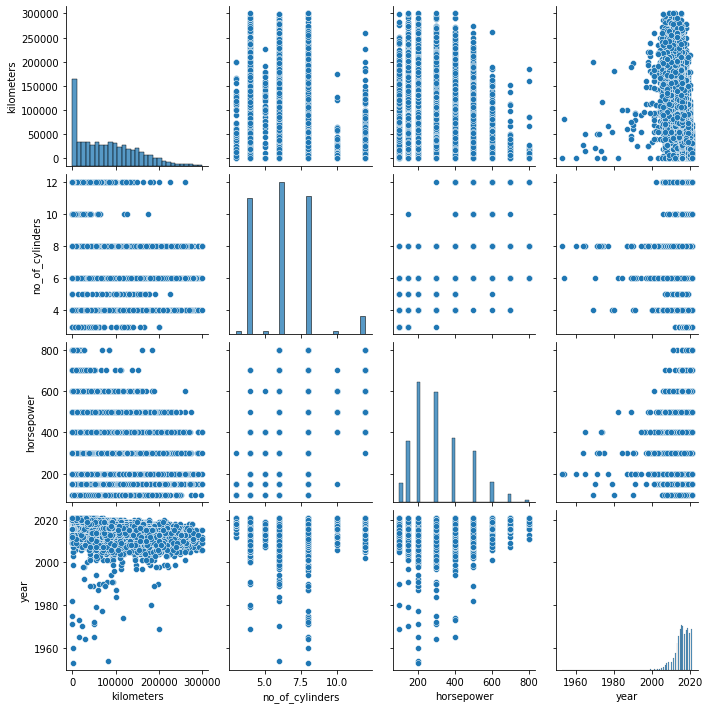

In [74]:
sns.pairplot(df)